# Search Algorithms

In this exercise, we will begin to explore computational complexity and explore the differences in various sorting and search algorithms.  We will begin with the base code for sequential/linear and binary search as described in Chapter 1 of Grokking Algorithms (Bhargava 2016).  Example code for the base algorithm is available in the GitHub site for the textbook.

To begin, let's generate some random data to work with. Ensure that a common random number seed is used to generate each of the arrays. We will make five arrays, each of length 512, 1024, 2048, 4096, and 8192 containing randomly generated uniformly distributed integers from 1 to 10000.  You may use the numpy package for this.  
Sort each of the random number arrays from smallest to largest.  You may use any algorithm to sort the data.
Execute the base search algorithm (binary search) (from the text and github code) for each of array, noting the execution time for each array.  With each execution use the maximum value of the random number array as the number for which you are searching.
Now we will compare this to a linear search.  Use python (perhaps with the Pandas package) to prepare a five-column table containing the following columns with all times in milliseconds:
length of the random number array
sort time
linear search time for the sorted array
binary search time for the sorted array
binary search plus sort times
Use python matplotlib or Seaborn to generate a plot with the size of the random number array on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against array size for linear and binary search algorithms alone.  Discuss the results.
Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against array size for each form of the algorithm being tested (last four columns of the table).  Discuss the results.
Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

Program code should conform to best practices in software development, as described in the coding/software development textbook used in the course.

Set up a personal computer-based Git repository (or private repository on Github) for your work with algorithms this term. Beginning with this week's mini programming assignment, utilize Git as you work on software development.

# Notes
n = size of the input to the algorithm

$O(1)$
- Constant

$O(n)$
- Linear

$O(n^2)$
- Quadratic

$O(2^n)$
- Exponential

$O(log(n))$
- Logarithmic




Quicksort
- Uses a pivot to split the array into 3 parts, the array filtered higher than the pivot, the array filtered lower than the pivot, and the pivot itself. Then the sort is called recursively onto each of this part until the divide and conquer leaves are all sorted, and they are concatenated.
Pros
- Parralelizable easily
- $O(n log n) time complexity best case

Cons
- Worst case is $O(n^2)$ if an array is mostly sorted and the pivot is the opposite side of the sort direction. Using the median of the array to determine the pivot will guarantee $O(n^2)$ but unlikely to prove useful in most datasets

Pro Tips
- Pivot should be randomly selected



### Imports, data, and setup
To begin, let's generate some random data to work with. Ensure that a common random number seed is used to generate each of the arrays. We will make five arrays, each of length 512, 1024, 2048, 4096, and 8192 containing randomly generated uniformly distributed integers from 1 to 10000.  

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import time

np.random.seed = 34 #set seed
LOG = {} # Define Log

#Define Data
r_1 = np.random.randint(1,10000, 2**9)
r_2 = np.random.randint(1,10000, 2**10)
r_3 = np.random.randint(1,10000, 2**11)
r_4 = np.random.randint(1,10000, 2**12)
r_5 = np.random.randint(1,10000, 2**13)
r_6 = np.random.randint(1,10000, 2**14)
r_7 = np.random.randint(1,10000, 2**15)

## Timing Function


In [2]:
def timeit(log):
    """ Wraps functions needing timing provided a dictionary to dump into based on function name"""
    def log_it(func):
        def wrapped(*args, **kw):
            ts = time.time_ns() // 1000000 
            result = func(*args, **kw)
            te = time.time_ns() // 1000000 
            if func.__name__ in log.keys():
                log[func.__name__].append(te-ts)
            else:
                log[func.__name__] = [te-ts]
            return result
        return wrapped
    return log_it

# Binary Search
Here we want to explore binary search as a baseline, what is the maximum execution time for each array size, what is the average?

The expiriment will be searching the largest number found in the array (predetermined)

In [3]:
@timeit(LOG)
def binary_search(arr, item):
    """
    Returns the index of the item if found, otherwise None. Time-complexity = O(log n)
    Parameters
    ----------
        arr : list, array
            the array to look in
        item : int, float
            the item to find
    """
    high_idx = len(arr)-1
    low_idx = 0

    while low_idx <= high_idx:
        mid_idx = (low_idx + high_idx)//2
        guess = arr[mid_idx]
        if guess == item:
            return mid_idx
        if guess > item:
            high_idx = mid_idx - 1
        else:
            low_idx = mid_idx + 1
    return None

# Linear Search

In [ ]:
@timeit(LOG)
def linear_search(arr, item):
    """
    Returns the index of item in array if found, otherwise None. Time-complexity = O(n)
    Parameters
    ----------
        arr : list, array
            the array to look in
        item : int, float
            the item to find
    """
    for i,potential in enumerate(arr):
        if item == potential:
            return i
        else:
            continue
    return None

# Quick Sort

In [4]:
@timeit(LOG)
def total_qsort(arr):
    def qsort(arr):
        """
        Returns a sorted array. Time-complexity = O(n log n)
        Parameters
        ----------
            arr : list, array
                the array to sort
        """
        #Base case  (already sorted)
        if len(arr) < 2:
            return arr
        #Recursive case
        else:
            pivot = arr[0]
            less = [i for i in arr[1:] if i <= pivot]
            greater = [i for i in arr[1:] if i > pivot]
            return qsort(less) + [pivot] + qsort(greater)
    return qsort(arr)

# Python native sort

In [5]:
@timeit(LOG)
def native_sort(arr):
    return sorted(arr)

# Experiment
- For binary search to work, it must be with a sorted array

In [6]:
trials = 100 #Trials of experiment
arrays = [r_1,r_2,r_3,r_4,r_5, r_6,r_7] #Raw data

#Largest numbers in rando mdata arrays
r_1_max = max(r_1)
r_2_max = max(r_2)
r_3_max = max(r_3)
r_4_max = max(r_4)
r_5_max = max(r_5)
r_6_max = max(r_6)
r_7_max = max(r_7)

#Future search term for experiment
search_item = [r_1_max,r_2_max,r_3_max,
               r_4_max,r_5_max,r_6_max,r_7_max]


### Recording sort time for 100 trials of each array size
- Binary Search only works when arrays are sorted.
- We will perform 100 trials of the qsort implementation above, and the native python sorted() function. The time it takes for these functions to execute will be logged 100 times.

In [8]:
#Sorting the arrays, putting in container, tracking time
sorted_arrays = []
for each_array in arrays:
    for trial in range(trials):
        s_a = total_qsort(each_array)
    sorted_arrays.append(s_a)
    
#Sorting the arrays, putting in container, tracking time    
sorted_arrays_native = []
for each_array in arrays:
    for trial in range(trials):
        s_a = native_sort(each_array)
    sorted_arrays_native.append(s_a)

#### Recording search time for 100 trials over sorted arrays

In [11]:
#Binary Search
for idx,array in enumerate(sorted_arrays):
    for trial in range(trials):
        binary_search(array, search_item[idx])
        
#Linear Search
for idx,array in enumerate(sorted_arrays):
    for trial in range(trials):
        linear_search(array, search_item[idx])

# Results

In [22]:
df = pd.DataFrame({'Array Length': sorted(list(map(len, arrays))*trials),
                   'qsort': LOG['total_qsort'],
                   'native_sort': LOG['native_sort'],
                   'binary':LOG['binary_search'],
                   'linear':LOG['linear_search'], 
                   'binary_plus_qsort': np.array(LOG['total_qsort']) + np.array(LOG['binary_search']),
                   'binary_plus_native_sort': np.array(LOG['native_sort']) + np.array(LOG['binary_search'])})


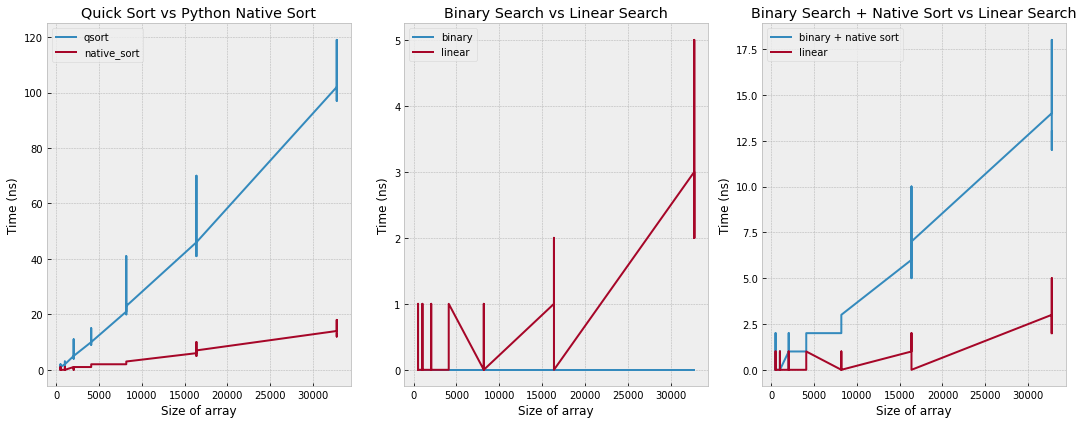

In [34]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
ax1,ax2,ax3 = axes.flatten()

ax1.plot(df['Array Length'], df['qsort'], label = 'qsort')
ax1.plot(df['Array Length'], df['native_sort'], label = 'native_sort')
ax1.set_title('Quick Sort vs Python Native Sort')
ax1.set_xlabel('Size of array')
ax1.set_ylabel('Time (ns)')
ax1.legend()

ax2.plot(df['Array Length'], df['binary'], label = 'binary')
ax2.plot(df['Array Length'], df['linear'], label = 'linear')
ax2.set_title('Binary Search vs Linear Search')
ax2.set_xlabel('Size of array')
ax2.set_ylabel('Time (ns)')
ax2.legend()



ax3.plot(df['Array Length'], df['binary_plus_native_sort'], label = 'binary + native sort')
ax3.plot(df['Array Length'], df['linear'], label = 'linear')
ax3.set_title('Binary Search + Native Sort vs Linear Search')
ax3.set_xlabel('Size of array')
ax3.set_ylabel('Time (ns)')
ax3.legend()

plt.tight_layout()




In [36]:
df = df.groupby(['Array Length']).agg(np.mean).reset_index()
df

,Array Length,qsort,native_sort,binary,linear,binary_plus_qsort,binary_plus_native_sort
0,512,1.04,0.13,0.01,0.02,1.05,0.14
1,1024,2.15,0.24,0.00,0.06,2.15,0.24
2,2048,5.23,0.60,0.01,0.13,5.24,0.61
3,4096,10.81,1.26,0.00,0.26,10.81,1.26
4,8192,23.96,2.82,0.00,0.56,23.96,2.82
5,16384,48.79,6.36,0.01,1.09,48.80,6.37
6,32768,106.01,13.36,0.00,2.33,106.01,13.36


In [ ]:

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
ax1,ax2,ax3 = axes.flatten()

ax1.plot(df['Array Length'], df['qsort'], label = 'qsort')
ax1.plot(df['Array Length'], df['native_sort'], label = 'native_sort')
ax1.set_title('Quick Sort vs Python Native Sort')
ax1.set_xlabel('Size of array')
ax1.set_ylabel('Time (ns)')
ax1.legend()

ax2.plot(df['Array Length'], df['binary'], label = 'binary')
ax2.plot(df['Array Length'], df['linear'], label = 'linear')
ax2.set_title('Binary Search vs Linear Search')
ax2.set_xlabel('Size of array')
ax2.set_ylabel('Time (ns)')
ax2.legend()



ax3.plot(df['Array Length'], df['binary_plus_native_sort'], label = 'binary + native sort')
ax3.plot(df['Array Length'], df['linear'], label = 'linear')
ax3.set_title('Binary Search + Native Sort vs Linear Search')
ax3.set_xlabel('Size of array')
ax3.set_ylabel('Time (ns)')
ax3.legend()

plt.tight_layout()